In [ ]:
!pip3 install lifelines

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           9.59 <0.005      9.00


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_18770/3212709688.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data[data['Group'] == 1][data['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_18770/3212709688.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data[data['Group'] == 2][data['Task'] == i]


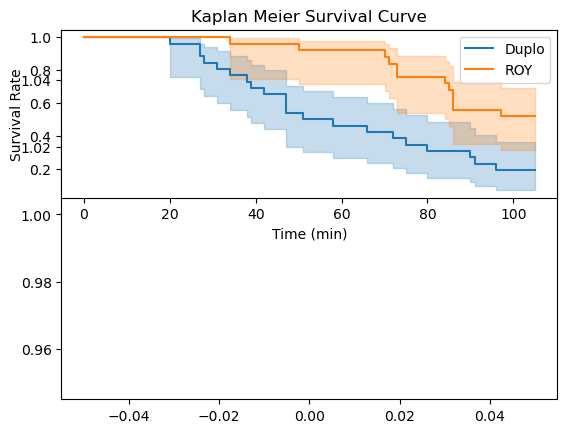

In [6]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from scipy.interpolate import interp1d
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('./data/duplo-eval.csv')
tasks = 1
time_col = 'Time'
event_col = 'Success'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	plt.subplot(2,1,1)
	group1_data = data[data['Group'] == 1][data['Task'] == i]
	group2_data = data[data['Group'] == 2][data['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	#plt.subplot(210 + i)
	ax = kmf1.plot(label='Duplo')
	kmf2.plot(ax=ax, label='ROY')
	plt.xlabel('')
	plt.ylabel('Survival Rate')
	print(logrank_test(group1_data['Time'], group2_data['Time'], event_observed_A=group1_data['Success'], event_observed_B=group2_data['Success']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()
